# Vortrace Quick Start

This guide will take you through a simple example showing how to do a density projection and slice of a Voronoi mesh. The input data for this notebook comes from snapshot 22 of the `galaxy_merger_star_formation_3d` example in the public version of the [Arepo code](https://arepo-code.org/).

In [10]:
import numpy as np
from vortrace import vortrace as vt
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py as h5

First we define a function which reads in an Arepo file, which is stored using the hdf5 file format. This would be replaced by user code interfacing or generating their needed data.

In [2]:
def read_arepo_snap(snapname):
    f = h5.File(snapname, mode='r')

    pos = np.array(f['PartType0']['Coordinates'])
    dens = np.array(f['PartType0']['Density'])
    BoxSize = f['Parameters'].attrs['BoxSize']

    f.close()

    return pos, dens, BoxSize

Next, we actually load in the data and create a Projection Cloud object. This object stores the Voronoi mesh data and facilitates various operations over the dataset.

In [3]:
snapname = '../tests/test_data/galaxy_interaction.hdf5'
pos, dens, BoxSize = read_arepo_snap(snapname)

L = 75.
pc = vt.ProjectionCloud(pos, dens, boundbox=[0., BoxSize, 0., BoxSize, 0., BoxSize])

Applying bounding box...
npart: 7217
Snapshot loaded.
Building tree...
Tree build took 1 milliseconds.


Now, we define the parameters for the projection we would like to do. For this, we'll do a grid projection which is useful for making images of galaxies.

In [16]:
xrng = yrng = [BoxSize / 2. - L / 2., BoxSize / 2. + L / 2.]
zrng = [0., BoxSize]
npix = [256, 256]

dat = pc.projection(xrng, yrng, npix, zrng=zrng)

[9.97909969e-07 1.00485216e-06 1.01179435e-06 ... 6.54896569e-07
 6.55380661e-07 6.55605848e-07]Making projection...
Projection generation took 2668 milliseconds.



Now, let's make a plot of this data.

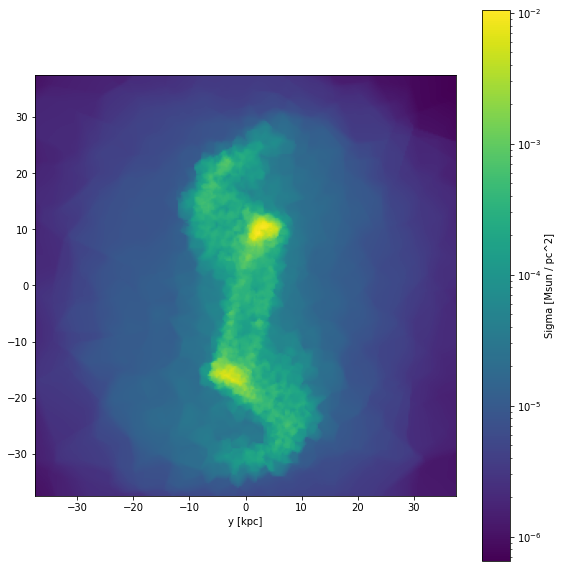

In [17]:
UnitL = 1e3 #pc
UnitM = 1e10 #Msun
UnitSigma = UnitM / (UnitL**2)

# dat *= UnitSigma

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

im = ax.imshow(dat.T, extent=[-L/2., L/2., -L/2., L/2.], origin = 'lower', norm=mpl.colors.LogNorm())

ax.set_xlabel('x [kpc]')
ax.set_xlabel('y [kpc]')

fig.colorbar(im, ax=ax, label='Sigma [Msun / pc^2]')
fig.tight_layout()

plt.show()